In [1]:
import tensorflow as tf

# Importing matplotlib to plot images.
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Importing SK-learn to calculate precision and recall
import sklearn
import sklearn.metrics

# Used for graph export
from tensorflow.python.framework import graph_util
from tensorflow.python.framework import graph_io
from keras.models import load_model
from keras import backend as K

tf.__version__

'2.4.1'

In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
print(x_train.shape)

x_train_new = x_train.reshape(-1, 784)
x_train_new.shape
y_train[18]

(60000, 28, 28)


6

### Applying One-Hot Encoding to the samples
If we have a set of bits (recall that these can have 0/1 values only), a one-hot encoded combination means that one of the set is 1 while the others are zero. Hence ‘one-hot’ encoding: there is one that is ‘hot’, or activated, while the others are ‘cold’.
Machine Learning models work with numeric data only. That is, they cannot natively accept text data and learn from it. Let's have a look at an example:
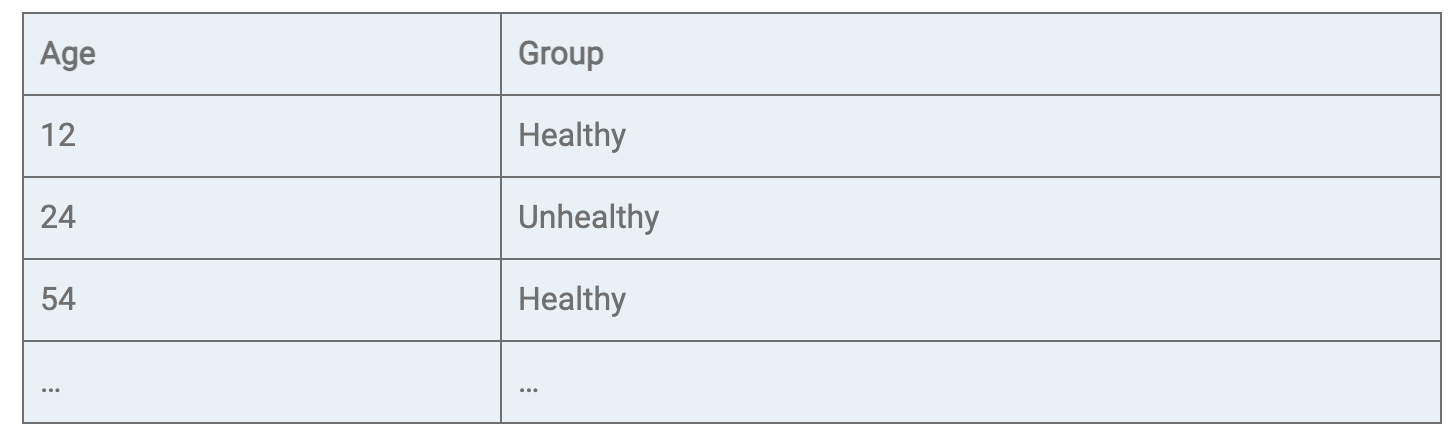

We can represent the Group values as a set of two bits. For example, if the person is Unhealthy, the category can be expressed as [0 1], while Healthy can be expressed as [1 0]. Naturally, we see that we now have a numeric (vector based) representation of our categories, which we can use in our Machine Learning model.

To get back to our example - y_train contains the labels for our data = the actual numbers shown in the images [0-9]
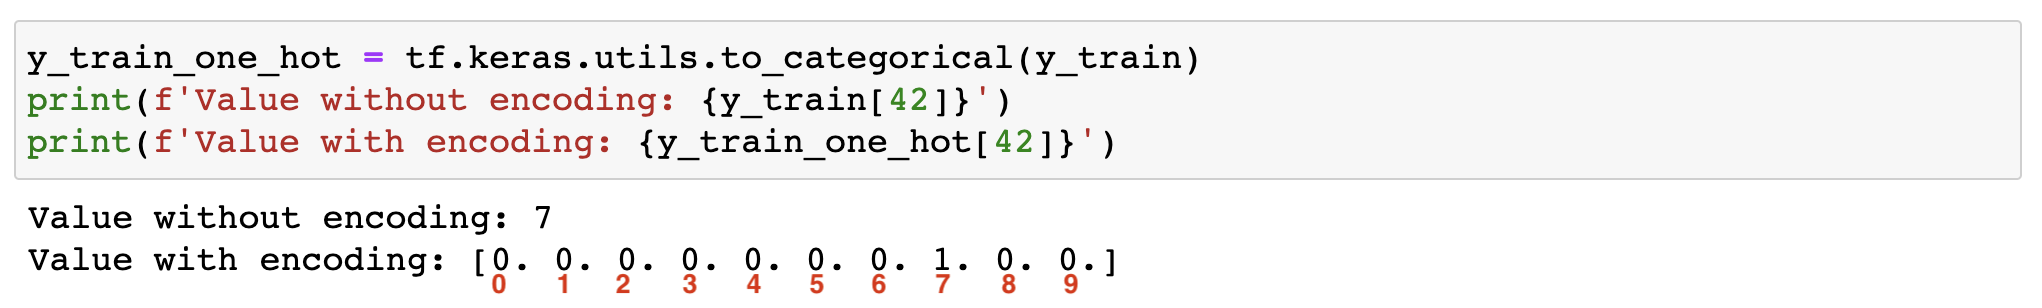

In [4]:
# flatten image data, (60000, 28, 28) to (60000, 784)
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# convert to float
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

# normalize to a scale between 0 and 1, rescale the images from [0,255] to the [0.0,1.0] range.
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices (one-hot notation)
num_classes = 10
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


Text(0.5, 1.0, 'Label for image 42 is: 7')

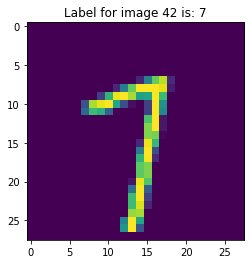

In [5]:
i = 42
plt.imshow(x_train[i].reshape(28, 28)) #np.sqrt(784) = 28
plt.title("Label for image %i is: %s" % (i, y_train[i]))

In [6]:
########## HYPER PARAMETERS
batch_size = 128
epochs = 10
optimizer = tf.keras.optimizers.RMSprop()
########## HYPER PARAMETERS

########## MODEL ARCHITECTURE
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(5, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
########## MODEL ARCHITECTURE

# Print summary
model.summary()

# compile model for training
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

history = model.fit(x_train, y_train_one_hot,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test_one_hot))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 3925      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                60        
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 1.8714 - accuracy: 0.3489 - val_loss: 1.0652 - val_accuracy: 0.7181
Epoch 2/10
469/469 [==============================] - 0s 795us/step - loss: 0.9764 - accuracy: 0.7361 - val_loss: 0.7171 - val_accuracy: 0.8240
Epoch 3/10
469/469 [==============================] - 0s 851us/step - loss: 0.6446 - accuracy: 0.8339 - val_loss: 0.5248 - val_accuracy: 0.8556
Epoch 4/10
469/469 [==============================] - 0s 781us/step - loss: 0.5168 - a

# Plot training and test accuracy

In [7]:
# use model for inference to get test accuracy
y_test_pred = model.predict(x_test)
y_test_pred = np.argmax(y_test_pred, axis=1)

print ('\n Summary of the precision, recall, F1 score for each class:')
print (sklearn.metrics.classification_report(y_test, y_test_pred))

print ('\n Confusion matrix: ')
print (sklearn.metrics.confusion_matrix(y_test, y_test_pred))


 Summary of the precision, recall, F1 score for each class:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       980
           1       0.93      0.97      0.95      1135
           2       0.91      0.84      0.87      1032
           3       0.83      0.84      0.83      1010
           4       0.90      0.92      0.91       982
           5       0.80      0.81      0.80       892
           6       0.95      0.93      0.94       958
           7       0.90      0.91      0.91      1028
           8       0.87      0.83      0.85       974
           9       0.88      0.88      0.88      1009

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


 Confusion matrix: 
[[ 937    1    0    7    0   18    7    6    4    0]
 [   1 1096   11    3    0    1    3    3   15    2]
 [  10   26  870   58    7    5   13    9   31    3]


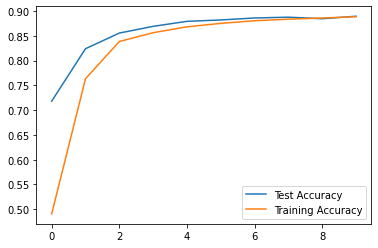

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'], label="Test Accuracy")
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.legend()

Call <code>model.save</code> to save a model's architecture, weights, and training configuration in a single file/folder. This allows you to export a model so it can be used without access to the original Python code. Since the optimizer-state is recovered, you can resume training from exactly where you left off.

An entire model can be saved in two different file formats (SavedModel and <a href="https://en.wikipedia.org/wiki/Hierarchical_Data_Format">HDF5</a>).

You can load saved models in TensorFlow.js and then train and run them in web browsers, or convert them to run on mobile devices using TensorFlow Lite.

In [9]:
# save model
model.save("myModel.h5")